In [1]:
%matplotlib inline
from astropy.io import fits, ascii
from astropy.table import Table
from astropy import units as u
import numpy as np
import matplotlib.pyplot as plt
from astropy.modeling import models, fitting

# CIV, OIII stack 

## Mean stack

('Centroid velocity in km/s = ', Parameter('mean_1', value=129.508548311))
('Error in centroid and dispersion = ', 29.637050569450917, 36.888585313717826)


<CompoundModel13(amplitude_0=0.9820864004272982, amplitude_1=0.12067924773354133, mean_1=129.5085483107168, stddev_1=252.44004484384865, amplitude_2=0.12067924773354133, mean_2=627.5085483107168, stddev_2=252.44004484384865)>

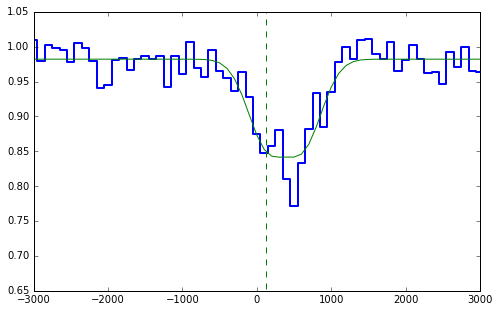

In [15]:
stack = fits.open('Output/QPQ9_zOIII_1548_mean.fits')
relativistic_equiv = u.doppler_relativistic(1548.195*u.AA)
velo = (stack[1].data*u.AA).to(u.km/u.s,equivalencies=relativistic_equiv)
g_1548_init = models.GaussianAbsorption1D(amplitude=0.1,mean=243.,stddev=235.)
g_1550_init = models.GaussianAbsorption1D(amplitude=0.05,mean=243.+498.,stddev=235.)
c_init = models.Const1D(amplitude=0.98)
model_init = c_init*g_1548_init*g_1550_init
def tie_mean2(model):
    mean_2 = model.mean_1 + 498.
    return mean_2
def tie_stddev2(model):
    stddev_2 = model.stddev_1 
    return stddev_2
def tie_amplitude2(model):
    amplitude_2 = model.amplitude_1
    return amplitude_2
model_init.amplitude_2.tied = tie_amplitude2
#model_init.amplitude_2.bounds = [0.072,1]
model_init.mean_2.tied = tie_mean2
model_init.stddev_2.tied = tie_stddev2
fit = fitting.LevMarLSQFitter()
model_final = fit(model_init,velo,stack[0].data)
plt.figure(figsize=(8,5))
plt.plot(velo.value,stack[0].data,drawstyle='steps-mid',linewidth=2.)
plt.plot(velo.value,model_final(velo.value),label='Gaussian')
plt.plot([model_final.mean_1.value,model_final.mean_1.value],[0,2],'g--')
plt.axis([-3000,3000,0.65,1.05])
print('Centroid velocity in km/s = ',model_final.mean_1)
print('Error in centroid and dispersion = ',np.sqrt(fit.fit_info['param_cov'][2][2]),np.sqrt(fit.fit_info['param_cov'][3][3]))
dict = {}
for ii,pp in enumerate(model_final.parameters):
    dict[model_final.param_names[ii]] = [pp]
ascii.write(Table(dict),'CIV_OIII_mean_fit.dat')
model_final

## Median stack

('Centroid velocity in km/s = ', Parameter('mean_1', value=240.343638623))


<CompoundModel1(amplitude_0=0.98, amplitude_1=0.04834590645254944, mean_1=240.34363862320157, stddev_1=225.92484396161674, amplitude_2=0.04834590645254944, mean_2=738.3436386232015, stddev_2=225.92484396161674)>

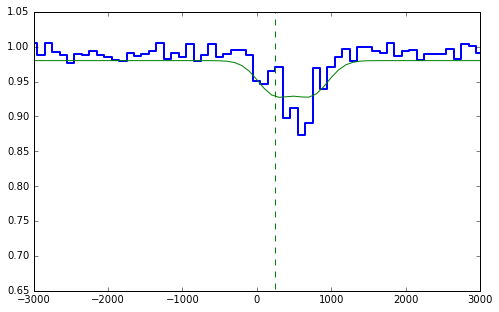

In [2]:
stack = fits.open('Output/QPQ9_zOIII_1548_med.fits')
relativistic_equiv = u.doppler_relativistic(1548.195*u.AA)
velo = (stack[1].data*u.AA).to(u.km/u.s,equivalencies=relativistic_equiv)
g_1548_init = models.GaussianAbsorption1D(amplitude=0.1,mean=243.,stddev=235.)
g_1550_init = models.GaussianAbsorption1D(amplitude=0.05,mean=243.+498.,stddev=235.)
c_init = models.Const1D(amplitude=0.98)
model_init = c_init*g_1548_init*g_1550_init
model_init.amplitude_0.fixed = True
def tie_mean2(model):
    mean_2 = model.mean_1 + 498.
    return mean_2
def tie_stddev2(model):
    stddev_2 = model.stddev_1 
    return stddev_2
def tie_amplitude2(model):
    amplitude_2 = model.amplitude_1
    return amplitude_2
model_init.amplitude_2.tied = tie_amplitude2
#model_init.amplitude_2.bounds = [0,0.062]
model_init.mean_2.tied = tie_mean2
model_init.stddev_2.tied = tie_stddev2
fit = fitting.LevMarLSQFitter()
model_final = fit(model_init,velo,stack[0].data)
plt.figure(figsize=(8,5))
plt.plot(velo.value, stack[0].data,drawstyle='steps-mid',linewidth=2.)
plt.plot(velo.value,model_final(velo.value),label='Gaussian')
plt.plot([model_final.mean_1.value,model_final.mean_1.value],[0,2],'g--')
plt.axis([-3000,3000,0.65,1.05])
print('Centroid velocity in km/s = ',model_final.mean_1)
# for some reason this line failed
#print('Error in centroid and dispersion = ',np.sqrt(fit.fit_info['param_cov'][2][2]),np.sqrt(fit.fit_info['param_cov'][3][3]))
dict = {}
for ii,pp in enumerate(model_final.parameters):
    dict[model_final.param_names[ii]] = [pp]
ascii.write(Table(dict),'CIV_OIII_median_fit.dat')
model_final

# CIV, MgII stack

## Mean stack

('Centroid velocity in km/s = ', Parameter('mean_1', value=59.8095299426))
('Error in centroid and dispersion = ', 47.126940548491582, 68.71494937120697)


<CompoundModel3(amplitude_0=0.9783125635125007, amplitude_1=0.04967338308598641, mean_1=59.80952994262812, stddev_1=320.0096621485968, amplitude_2=0.04967338308598641, mean_2=557.8095299426282, stddev_2=320.0096621485968)>

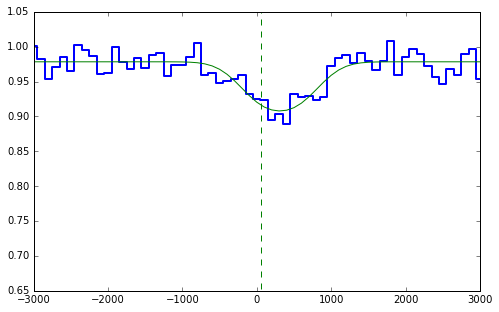

In [4]:
stack = fits.open('Output/QPQ9_zIRMgII_1548_mean.fits')
relativistic_equiv = u.doppler_relativistic(1548.195*u.AA)
velo = (stack[1].data*u.AA).to(u.km/u.s,equivalencies=relativistic_equiv)
g_1548_init = models.GaussianAbsorption1D(amplitude=0.1,mean=100,stddev=300.)
g_1550_init = models.GaussianAbsorption1D(amplitude=0.05,mean=100.+498.,stddev=300.)
c_init = models.Const1D(amplitude=0.97)
model_init = c_init*g_1548_init*g_1550_init
def tie_mean2(model):
    mean_2 = model.mean_1 + 498.
    return mean_2
def tie_stddev2(model):
    stddev_2 = model.stddev_1 
    return stddev_2
def tie_amplitude2(model):
    amplitude_2 = model.amplitude_1
    return amplitude_2
model_init.amplitude_2.tied = tie_amplitude2
model_init.mean_2.tied = tie_mean2
model_init.stddev_2.tied = tie_stddev2
fit = fitting.LevMarLSQFitter()
model_final = fit(model_init,velo,stack[0].data)
plt.figure(figsize=(8,5))
plt.plot(velo.value,stack[0].data,drawstyle='steps-mid',linewidth=2.)
plt.plot(velo.value,model_final(velo.value),label='Gaussian')
plt.plot([model_final.mean_1.value,model_final.mean_1.value],[0,2],'g--')
plt.axis([-3000,3000,0.65,1.05])
print('Centroid velocity in km/s = ',model_final.mean_1)
print('Error in centroid and dispersion = ',np.sqrt(fit.fit_info['param_cov'][2][2]),np.sqrt(fit.fit_info['param_cov'][3][3]))
dict = {}
for ii,pp in enumerate(model_final.parameters):
    dict[model_final.param_names[ii]] = [pp]
ascii.write(Table(dict),'CIV_MgII_mean_fit.dat')
model_final

('Centroid velocity in km/s = ', Parameter('mean_1', value=275.17509366))
('Error in centroid and dispersion = ', 42.694044279807883, 32.904396384452838)


<CompoundModel5(amplitude_0=0.9876102458021724, amplitude_1=0.040855298905582614, mean_1=275.17509366017714, stddev_1=200.0967595773968, amplitude_2=0.026545264936505643, mean_2=773.1750936601771, stddev_2=200.0967595773968)>

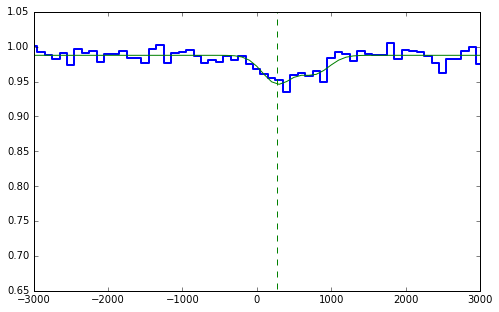

In [5]:
stack = fits.open('Output/QPQ9_zIRMgII_1548_med.fits')
relativistic_equiv = u.doppler_relativistic(1548.195*u.AA)
velo = (stack[1].data*u.AA).to(u.km/u.s,equivalencies=relativistic_equiv)
g_1548_init = models.GaussianAbsorption1D(amplitude=0.1,mean=100,stddev=235.)
g_1550_init = models.GaussianAbsorption1D(amplitude=0.05,mean=100.+498.,stddev=235.)
c_init = models.Const1D(amplitude=0.98)
model_init = c_init*g_1548_init*g_1550_init
def tie_mean2(model):
    mean_2 = model.mean_1 + 498.
    return mean_2
def tie_stddev2(model):
    stddev_2 = model.stddev_1 
    return stddev_2
def tie_amplitude2(model):
    amplitude_2 = model.amplitude_1
    return amplitude_2
#model_init.amplitude_2.tied = tie_amplitude2
#model_init.amplitude_2.bounds = [0.02/2,0.02]
model_init.mean_2.tied = tie_mean2
model_init.stddev_2.tied = tie_stddev2
fit = fitting.LevMarLSQFitter()
model_final = fit(model_init,velo,stack[0].data)
plt.figure(figsize=(8,5))
plt.plot(velo.value,stack[0].data,drawstyle='steps-mid',linewidth=2.)
plt.plot(velo.value,model_final(velo.value),label='Gaussian')
plt.plot([model_final.mean_1.value,model_final.mean_1.value],[0,2],'g--')
plt.axis([-3000,3000,0.65,1.05])
print('Centroid velocity in km/s = ',model_final.mean_1)
print('Error in centroid and dispersion = ',np.sqrt(fit.fit_info['param_cov'][2][2]),np.sqrt(fit.fit_info['param_cov'][3][3]))
dict = {}
for ii,pp in enumerate(model_final.parameters):
    dict[model_final.param_names[ii]] = [pp]
ascii.write(Table(dict),'CIV_MgII_median_fit.dat')
model_final

# CII, OIII stack

## Mean stack

('Centroid velocity in km/s = ', Parameter('mean_1', value=220.110989003))
('Error in centroid and dispersion = ', 25.787496671999477, 27.70107494553584)


<CompoundModel2(amplitude_0=0.9816792466160813, amplitude_1=0.1546990341203578, mean_1=220.11098900277293, stddev_1=362.3200772177433)>

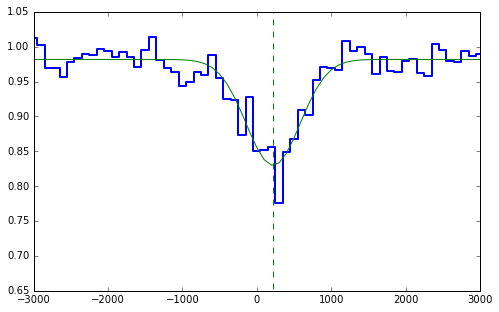

In [4]:
stack = fits.open('Output/QPQ9_zOIII_1334_mean.fits')
relativistic_equiv = u.doppler_relativistic(1334.5323*u.AA)
velo = (stack[1].data*u.AA).to(u.km/u.s,equivalencies=relativistic_equiv)
g_init = models.GaussianAbsorption1D(amplitude=0.2,mean=170.,stddev=388.)
c_init = models.Const1D(amplitude=0.98)
model_init = c_init*g_init
fit = fitting.LevMarLSQFitter()
model_final = fit(model_init,velo,stack[0].data)
plt.figure(figsize=(8,5))
plt.plot(velo.value,stack[0].data,drawstyle='steps-mid',linewidth=2.)
plt.plot(velo.value,model_final(velo.value),label='Gaussian')
plt.plot([model_final.mean_1.value,model_final.mean_1.value],[0,2],'g--')
plt.axis([-3000,3000,0.65,1.05])
print('Centroid velocity in km/s = ',model_final.mean_1)
print('Error in centroid and dispersion = ',np.sqrt(fit.fit_info['param_cov'][2][2]),np.sqrt(fit.fit_info['param_cov'][3][3]))
dict = {}
for ii,pp in enumerate(model_final.parameters):
    dict[model_final.param_names[ii]] = [pp]
ascii.write(Table(dict),'CII_OIII_mean_fit.dat')
model_final

## Median stack

('Centroid velocity in km/s = ', Parameter('mean_1', value=154.313346609))
('Error in centroid and dispersion = ', 64.094313817702243, 67.901069186458997)


<CompoundModel3(amplitude_0=0.9909298963450428, amplitude_1=0.030029700985339434, mean_1=154.31334660866992, stddev_1=307.8717452305234)>

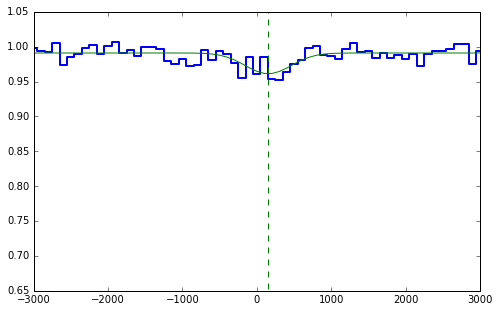

In [5]:
stack = fits.open('Output/QPQ9_zOIII_1334_med.fits')
relativistic_equiv = u.doppler_relativistic(1334.5323*u.AA)
velo = (stack[1].data*u.AA).to(u.km/u.s,equivalencies=relativistic_equiv)
g_init = models.GaussianAbsorption1D(amplitude=0.2,mean=257.,stddev=268.)
c_init = models.Const1D(amplitude=0.98)
model_init = c_init*g_init
fit = fitting.LevMarLSQFitter()
model_final = fit(model_init,velo,stack[0].data)
plt.figure(figsize=(8,5))
plt.plot(velo.value,stack[0].data,drawstyle='steps-mid',linewidth=2.)
plt.plot(velo.value,model_final(velo.value),label='Gaussian')
plt.plot([model_final.mean_1.value,model_final.mean_1.value],[0,2],'g--')
plt.axis([-3000,3000,0.65,1.05])
print('Centroid velocity in km/s = ',model_final.mean_1)
print('Error in centroid and dispersion = ',np.sqrt(fit.fit_info['param_cov'][2][2]),np.sqrt(fit.fit_info['param_cov'][3][3]))
dict = {}
for ii,pp in enumerate(model_final.parameters):
    dict[model_final.param_names[ii]] = [pp]
ascii.write(Table(dict),'CII_OIII_median_fit.dat')
model_final

# CII, MgII stack 

## Mean stack

('Centroid velocity in km/s = ', Parameter('mean_1', value=195.513034042))
('Error in amplitude =', 0.010861713286240493)
('Error in centroid and dispersion = ', 27.644357867821405, 29.32018001434292)


<CompoundModel0(amplitude_0=0.9735702483110276, amplitude_1=0.1399999298496756, mean_1=195.51303404167854, stddev_1=312.65857167420313)>

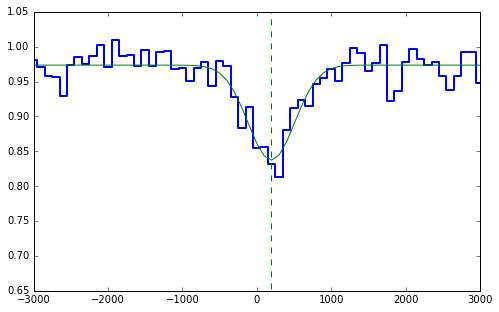

In [2]:
stack = fits.open('Output/QPQ9_zIRMgII_1334_mean.fits')
relativistic_equiv = u.doppler_relativistic(1334.5323*u.AA)
velo = (stack[1].data*u.AA).to(u.km/u.s,equivalencies=relativistic_equiv)
g_init = models.GaussianAbsorption1D(amplitude=0.2,mean=100.,stddev=300.)
c_init = models.Const1D(amplitude=0.98)
model_init = c_init*g_init
fit = fitting.LevMarLSQFitter()
model_final = fit(model_init,velo,stack[0].data)
plt.figure(figsize=(8,5))
plt.plot(velo.value,stack[0].data,drawstyle='steps-mid',linewidth=2.)
plt.plot(velo.value,model_final(velo.value),label='Gaussian')
plt.plot([model_final.mean_1.value,model_final.mean_1.value],[0,2],'g--')
plt.axis([-3000,3000,0.65,1.05])
print('Centroid velocity in km/s = ',model_final.mean_1)
print('Error in amplitude =',np.sqrt(fit.fit_info['param_cov'][1][1]))
print('Error in centroid and dispersion = ',np.sqrt(fit.fit_info['param_cov'][2][2]),np.sqrt(fit.fit_info['param_cov'][3][3]))
dict = {}
for ii,pp in enumerate(model_final.parameters):
    dict[model_final.param_names[ii]] = [pp]
ascii.write(Table(dict),'CII_MgII_mean_fit.dat')
model_final

## Median stack 

('Centroid velocity in km/s = ', Parameter('mean_1', value=120.074179816))
('Error in centroid and dispersion = ', 96.365521637510767, 106.30937994609438)


<CompoundModel1(amplitude_0=0.9872568882931508, amplitude_1=0.027301749410234888, mean_1=120.07417981598111, stddev_1=452.3710679993153)>

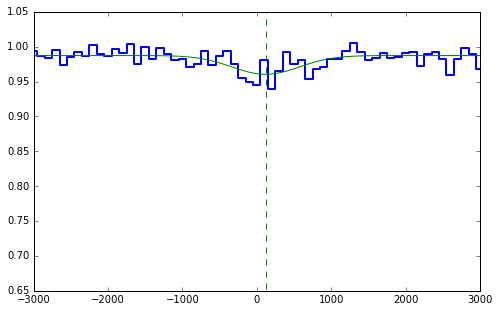

In [3]:
stack = fits.open('Output/QPQ9_zIRMgII_1334_med.fits')
relativistic_equiv = u.doppler_relativistic(1334.5323*u.AA)
velo = (stack[1].data*u.AA).to(u.km/u.s,equivalencies=relativistic_equiv)
g_init = models.GaussianAbsorption1D(amplitude=0.2,mean=100.,stddev=300.)
c_init = models.Const1D(amplitude=0.98)
model_init = c_init*g_init
fit = fitting.LevMarLSQFitter()
model_final = fit(model_init,velo,stack[0].data)
plt.figure(figsize=(8,5))
plt.plot(velo.value,stack[0].data,drawstyle='steps-mid',linewidth=2.)
plt.plot(velo.value,model_final(velo.value),label='Gaussian')
plt.plot([model_final.mean_1.value,model_final.mean_1.value],[0,2],'g--')
plt.axis([-3000,3000,0.65,1.05])
print('Centroid velocity in km/s = ',model_final.mean_1)
print('Error in centroid and dispersion = ',np.sqrt(fit.fit_info['param_cov'][2][2]),np.sqrt(fit.fit_info['param_cov'][3][3]))
dict = {}
for ii,pp in enumerate(model_final.parameters):
    dict[model_final.param_names[ii]] = [pp]
ascii.write(Table(dict),'CII_MgII_median_fit.dat')
model_final

# MgII, OIII stack

## Mean stack 

('Centroid velocity in km/s = ', Parameter('mean_1', value=211.522538652))


<CompoundModel19(amplitude_0=0.9543861215362727, amplitude_1=0.1888930700315003, mean_1=211.5225386522155, stddev_1=231.41179517410805, amplitude_2=0.15707341455877014, mean_2=980.5225386522155, stddev_2=231.41179517410805)>

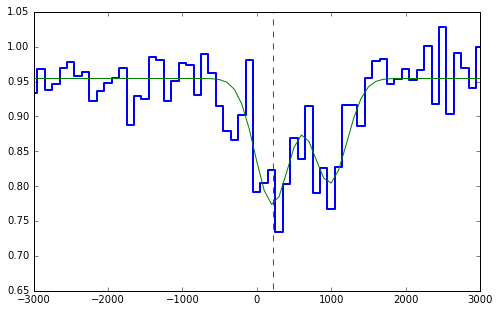

In [14]:
stack = fits.open('Output/QPQ9_zOIII_2796_mean.fits')
relativistic_equiv = u.doppler_relativistic(2796.354*u.AA)
velo = (stack[1].data*u.AA).to(u.km/u.s,equivalencies=relativistic_equiv)
g_2796_init = models.GaussianAbsorption1D(amplitude=0.3,mean=200.,stddev=250.)
g_2803_init = models.GaussianAbsorption1D(amplitude=0.15,mean=969.,stddev=250.)
c_init = models.Const1D(amplitude=0.95)
model_init = c_init*g_2796_init*g_2803_init
def tie_mean2(model):
    mean_2 = model.mean_1 + 769.
    return mean_2
def tie_stddev2(model):
    stddev_2 = model.stddev_1 
    return stddev_2
model_init.mean_2.tied = tie_mean2
model_init.stddev_2.tied = tie_stddev2
fit = fitting.LevMarLSQFitter()
model_final = fit(model_init,velo,stack[0].data)
plt.figure(figsize=(8,5))
plt.plot(velo.value,stack[0].data,drawstyle='steps-mid',linewidth=2.)
plt.plot(velo.value,model_final(velo.value),label='Gaussian')
plt.plot([model_final.mean_1.value,model_final.mean_1.value],[0,2],'g--')
plt.axis([-3000,3000,0.65,1.05])
print('Centroid velocity in km/s = ',model_final.mean_1)
#print('Error in centroid and dispersion = ',np.sqrt(fit.fit_info['param_cov'][2][2]),np.sqrt(fit.fit_info['param_cov'][3][3]))
dict = {}
for ii,pp in enumerate(model_final.parameters):
    dict[model_final.param_names[ii]] = [pp]
ascii.write(Table(dict),'MgII_OIII_mean_fit.dat')
model_final

## Median stack

('Centroid velocity in km/s = ', Parameter('mean_1', value=242.024536723))


<CompoundModel21(amplitude_0=0.9776137888494534, amplitude_1=0.14192152288881557, mean_1=242.0245367233401, stddev_1=180.07545829400934, amplitude_2=0.06294756960996699, mean_2=1011.0245367233401, stddev_2=180.07545829400934)>

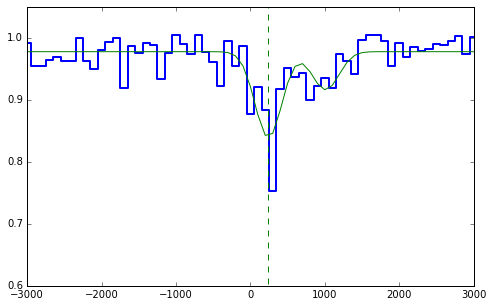

In [15]:
stack = fits.open('Output/QPQ9_zOIII_2796_med.fits')
relativistic_equiv = u.doppler_relativistic(2796.354*u.AA)
velo = (stack[1].data*u.AA).to(u.km/u.s,equivalencies=relativistic_equiv)
g_2796_init = models.GaussianAbsorption1D(amplitude=0.3,mean=250.,stddev=250.)
g_2803_init = models.GaussianAbsorption1D(amplitude=0.15,mean=1019.,stddev=250.)
c_init = models.Const1D(amplitude=0.95)
model_init = c_init*g_2796_init*g_2803_init
def tie_mean2(model):
    mean_2 = model.mean_1 + 769.
    return mean_2
def tie_stddev2(model):
    stddev_2 = model.stddev_1 
    return stddev_2
model_init.mean_2.tied = tie_mean2
model_init.stddev_2.tied = tie_stddev2
fit = fitting.LevMarLSQFitter()
model_final = fit(model_init,velo,stack[0].data)
plt.figure(figsize=(8,5))
plt.plot(velo.value,stack[0].data,drawstyle='steps-mid',linewidth=2.)
plt.plot(velo.value,model_final(velo.value),label='Gaussian')
plt.plot([model_final.mean_1.value,model_final.mean_1.value],[0,2],'g--')
plt.axis([-3000,3000,0.6,1.05])
print('Centroid velocity in km/s = ',model_final.mean_1)
#print('Error in centroid and dispersion = ',np.sqrt(fit.fit_info['param_cov'][2][2]),np.sqrt(fit.fit_info['param_cov'][3][3]))
dict = {}
for ii,pp in enumerate(model_final.parameters):
    dict[model_final.param_names[ii]] = [pp]
ascii.write(Table(dict),'MgII_OIII_median_fit.dat')
model_final

# MgII, MgII stack 

## Mean stack

('Centroid velocity in km/s = ', Parameter('mean_1', value=158.514744222))


<CompoundModel15(amplitude_0=0.9829297366554858, amplitude_1=0.08293891103873428, mean_1=158.51474422229572, stddev_1=290.45878265266595, amplitude_2=0.07263901858502506, mean_2=927.5147442222957, stddev_2=290.45878265266595)>

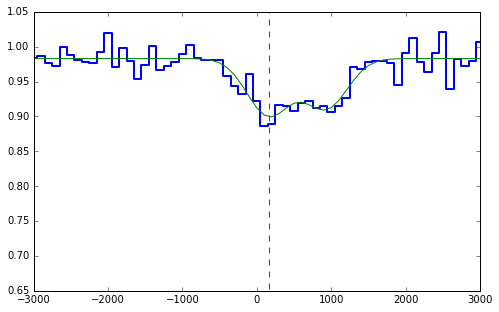

In [12]:
stack = fits.open('Output/QPQ9_zIRMgII_2796_mean.fits')
relativistic_equiv = u.doppler_relativistic(2796.354*u.AA)
velo = (stack[1].data*u.AA).to(u.km/u.s,equivalencies=relativistic_equiv)
g_2796_init = models.GaussianAbsorption1D(amplitude=0.3,mean=400.,stddev=250.)
g_2803_init = models.GaussianAbsorption1D(amplitude=0.15,mean=1169.,stddev=250.)
c_init = models.Const1D(amplitude=0.95)
model_init = c_init*g_2796_init*g_2803_init
def tie_mean2(model):
    mean_2 = model.mean_1 + 769.
    return mean_2
def tie_stddev2(model):
    stddev_2 = model.stddev_1 
    return stddev_2
model_init.mean_2.tied = tie_mean2
model_init.stddev_2.tied = tie_stddev2
fit = fitting.LevMarLSQFitter()
model_final = fit(model_init,velo,stack[0].data)
plt.figure(figsize=(8,5))
plt.plot(velo.value,stack[0].data,drawstyle='steps-mid',linewidth=2.)
plt.plot(velo.value,model_final(velo.value),label='Gaussian')
plt.plot([model_final.mean_1.value,model_final.mean_1.value],[0,2],'g--')
plt.axis([-3000,3000,0.65,1.05])
print('Centroid velocity in km/s = ',model_final.mean_1)
#for some reason this line failed
#print('Error in centroid and dispersion = ',np.sqrt(fit.fit_info['param_cov'][2][2]),np.sqrt(fit.fit_info['param_cov'][3][3]))
dict = {}
for ii,pp in enumerate(model_final.parameters):
    dict[model_final.param_names[ii]] = [pp]
ascii.write(Table(dict),'MgII_MgII_mean_fit.dat')
model_final

## Median stack

('Centroid velocity in km/s = ', Parameter('mean_1', value=-37.2940686914))


<CompoundModel17(amplitude_0=0.9885999066978391, amplitude_1=0.029414159351038673, mean_1=-37.29406869143806, stddev_1=252.4845625999723, amplitude_2=0.029414159351038673, mean_2=731.705931308562, stddev_2=252.4845625999723)>

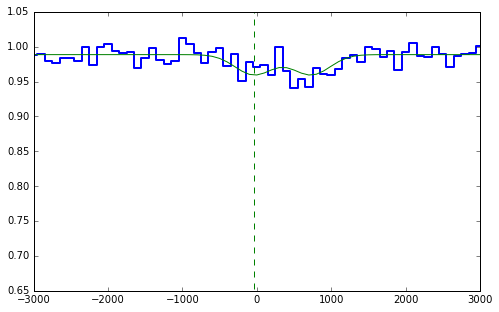

In [13]:
stack = fits.open('Output/QPQ9_zIRMgII_2796_med.fits')
relativistic_equiv = u.doppler_relativistic(2796.354*u.AA)
velo = (stack[1].data*u.AA).to(u.km/u.s,equivalencies=relativistic_equiv)
g_2796_init = models.GaussianAbsorption1D(amplitude=0.1,mean=100.,stddev=250.)
g_2803_init = models.GaussianAbsorption1D(amplitude=0.05,mean=869.,stddev=250.)
c_init = models.Const1D(amplitude=0.99)
model_init = c_init*g_2796_init*g_2803_init
def tie_amplitude2(model):
    amplitude_2 = model.amplitude_1
    return amplitude_2
def tie_mean2(model):
    mean_2 = model.mean_1 + 769.
    return mean_2
def tie_stddev2(model):
    stddev_2 = model.stddev_1 
    return stddev_2
model_init.amplitude_2.tied = tie_amplitude2
model_init.mean_2.tied = tie_mean2
model_init.stddev_2.tied = tie_stddev2
fit = fitting.LevMarLSQFitter()
model_final = fit(model_init,velo,stack[0].data)
plt.figure(figsize=(8,5))
plt.plot(velo.value,stack[0].data,drawstyle='steps-mid',linewidth=2.)
plt.plot(velo.value,model_final(velo.value),label='Gaussian')
plt.plot([model_final.mean_1.value,model_final.mean_1.value],[0,2],'g--')
plt.axis([-3000,3000,0.65,1.05])
print('Centroid velocity in km/s = ',model_final.mean_1)
#For some reason this line failed
#print('Error in centroid and dispersion = ',np.sqrt(fit.fit_info['param_cov'][2][2]),np.sqrt(fit.fit_info['param_cov'][3][3]))
dict = {}
for ii,pp in enumerate(model_final.parameters):
    dict[model_final.param_names[ii]] = [pp]
ascii.write(Table(dict),'MgII_MgII_median_fit.dat')
model_final

# MgII at z = 1 stack

## Mean stack  

('Centroid velocity in km/s = ', Parameter('mean_1', value=-9.38346169633))


<CompoundModel3(amplitude_0=0.9928443313665107, amplitude_1=0.03487518929446777, mean_1=-9.383461696325682, stddev_1=160.7750854212131, amplitude_2=0.02552420690073549, mean_2=759.6165383036744, stddev_2=160.7750854212131)>

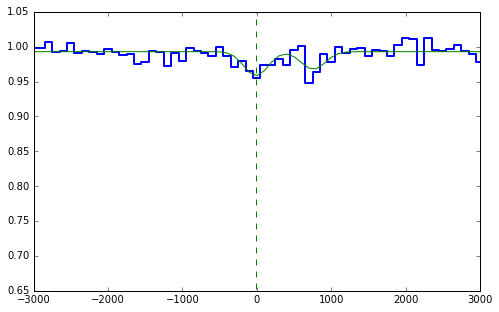

In [3]:
stack = fits.open('Output/QPQ9_zIRMgII_2796_z1_mean.fits')
relativistic_equiv = u.doppler_relativistic(2796.354*u.AA)
velo = (stack[1].data*u.AA).to(u.km/u.s,equivalencies=relativistic_equiv)
g_2796_init = models.GaussianAbsorption1D(amplitude=0.3,mean=0.,stddev=250.)
g_2803_init = models.GaussianAbsorption1D(amplitude=0.15,mean=769.,stddev=250.)
c_init = models.Const1D(amplitude=0.95)
model_init = c_init*g_2796_init*g_2803_init
def tie_mean2(model):
    mean_2 = model.mean_1 + 769.
    return mean_2
def tie_stddev2(model):
    stddev_2 = model.stddev_1 
    return stddev_2
model_init.mean_2.tied = tie_mean2
model_init.stddev_2.tied = tie_stddev2
fit = fitting.LevMarLSQFitter()
model_final = fit(model_init,velo,stack[0].data)
plt.figure(figsize=(8,5))
plt.plot(velo.value,stack[0].data,drawstyle='steps-mid',linewidth=2.)
plt.plot(velo.value,model_final(velo.value),label='Gaussian')
plt.plot([model_final.mean_1.value,model_final.mean_1.value],[0,2],'g--')
plt.axis([-3000,3000,0.65,1.05])
print('Centroid velocity in km/s = ',model_final.mean_1)
#print('Error in centroid and dispersion = ',np.sqrt(fit.fit_info['param_cov'][2][2]),np.sqrt(fit.fit_info['param_cov'][3][3]))
dict = {}
for ii,pp in enumerate(model_final.parameters):
    dict[model_final.param_names[ii]] = [pp]
ascii.write(Table(dict),'MgII_z1_mean_fit.dat')
model_final

In [3]:
print(fit.fit_info['param_cov'])
model_final.param_names

[[  1.40682905e-04   4.99447689e-05  -6.31738043e-01]
 [  4.99447689e-05   3.59389607e+03  -2.36196703e-01]
 [ -6.31738043e-01  -2.36196703e-01   3.85551901e+03]]


(u'amplitude_0',
 u'amplitude_1',
 u'mean_1',
 u'stddev_1',
 u'amplitude_2',
 u'mean_2',
 u'stddev_2')

## Median stack 

('Centroid velocity in km/s = ', Parameter('mean_1', value=-99.6009144825))


<CompoundModel3(amplitude_0=0.9985079631680934, amplitude_1=0.01649071099317348, mean_1=-99.6009144825078, stddev_1=177.62512659419423, amplitude_2=0.012711027697178192, mean_2=669.3990855174922, stddev_2=177.62512659419423)>

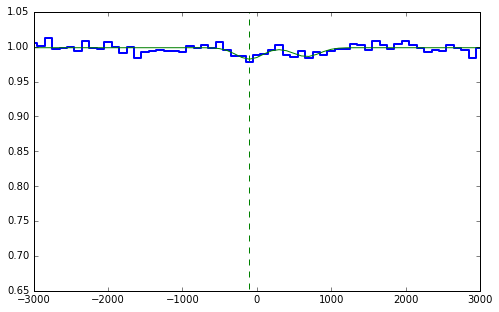

In [3]:
stack = fits.open('Output/QPQ9_zIRMgII_2796_z1_med.fits')
relativistic_equiv = u.doppler_relativistic(2796.354*u.AA)
velo = (stack[1].data*u.AA).to(u.km/u.s,equivalencies=relativistic_equiv)
g_2796_init = models.GaussianAbsorption1D(amplitude=0.3,mean=0.,stddev=250.)
g_2803_init = models.GaussianAbsorption1D(amplitude=0.15,mean=769.,stddev=250.)
c_init = models.Const1D(amplitude=0.95)
model_init = c_init*g_2796_init*g_2803_init
def tie_mean2(model):
    mean_2 = model.mean_1 + 769.
    return mean_2
def tie_stddev2(model):
    stddev_2 = model.stddev_1 
    return stddev_2
model_init.mean_2.tied = tie_mean2
model_init.stddev_2.tied = tie_stddev2
fit = fitting.LevMarLSQFitter()
model_final = fit(model_init,velo,stack[0].data)
plt.figure(figsize=(8,5))
plt.plot(velo.value,stack[0].data,drawstyle='steps-mid',linewidth=2.)
plt.plot(velo.value,model_final(velo.value),label='Gaussian')
plt.plot([model_final.mean_1.value,model_final.mean_1.value],[0,2],'g--')
plt.axis([-3000,3000,0.65,1.05])
print('Centroid velocity in km/s = ',model_final.mean_1)
#print('Error in centroid and dispersion = ',np.sqrt(fit.fit_info['param_cov'][2][2]),np.sqrt(fit.fit_info['param_cov'][3][3]))
dict = {}
for ii,pp in enumerate(model_final.parameters):
    dict[model_final.param_names[ii]] = [pp]
ascii.write(Table(dict),'MgII_z1_median_fit.dat')
model_final

# CIV foreground quasar stack 

<CompoundModel92(slope_0=1.6216453676836206e-06, intercept_0=0.9835803072187345, amplitude_1=0.028672582135876, mean_1=-2512.039953476008, stddev_1=2079.834165724614, amplitude_2=0.028672582135876, mean_2=-2014.0399534760081, stddev_2=2079.834165724614)>

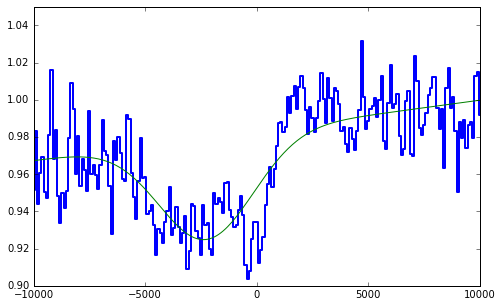

In [60]:
CIV_stack = fits.open('Output/QPQ9_1548_fg_mean.fits')
relativistic_equiv = u.doppler_relativistic(1548.195*u.AA)
velo = (CIV_stack[1].data*u.AA).to(u.km/u.s,equivalencies=relativistic_equiv)
g1_1548_init = models.GaussianAbsorption1D(amplitude=0.05,mean=-4000.,stddev=1000.)
g1_1550_init = models.GaussianAbsorption1D(amplitude=0.05,mean=-4000.+498.,stddev=1000.)
#g2_1548_init = models.GaussianAbsorption1D(amplitude=0.01,mean=-400.,stddev=500.)
#g2_1550_init = models.GaussianAbsorption1D(amplitude=0.01,mean=-400.+498.,stddev=500.)
l_init = models.Linear1D(intercept=0.97,slope=0.00001)
#model_init = l_init*(g1_1548_init*g1_1550_init)*(g2_1548_init*g2_1550_init)
model_init = l_init*(g1_1548_init*g1_1550_init)
def tie_mean2(model):
    mean_2 = model.mean_1 + 498.
    return mean_2
def tie_stddev2(model):
    stddev_2 = model.stddev_1 
    return stddev_2
def tie_amplitude2(model):
    amplitude_2 = model.amplitude_1
    return amplitude_2
#def tie_mean4(model):
#    mean_4 = model.mean_3 + 498.
#    return mean_4
#def tie_stddev4(model):
#    stddev_4 = model.stddev_3
#    return stddev_4
model_init.mean_2.tied = tie_mean2
model_init.stddev_2.tied = tie_stddev2
model_init.amplitude_2.tied = tie_amplitude2
#model_init.mean_4.tied = tie_mean4
#model_init.stddev_4.tied = tie_stddev4
fit = fitting.LevMarLSQFitter()
model_final = fit(model_init,velo,CIV_stack[0].data)
plt.figure(figsize=(8,5))
plt.plot(velo.value, CIV_stack[0].data,drawstyle='steps-mid',linewidth=2.)
plt.plot(velo.value, model_final(velo.value), label='Gaussian')
plt.axis([-10000,10000,0.90,1.05])
model_final
